Project Description : CV task to classifytennis ball using MXNet Framework API - Gluoncv. The CV task is trained using MobileNet 1.0 model (Transfer Learning model comprises of 1000 classes), which is a pre-trained on ImageNet.

### 1. Import Dependencies Library

In [0]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
from pathlib import Path

##### Specify Image Location

##### Loading an image 

In [0]:
def load_image(filepath):
    
    return mx.image.imread(filepath)

test_filepath = '/ben-hershey-VEW78A1YZ6I-unsplash.jpg'
test_output = load_image(test_filepath)

##### Transforming an image 

In [0]:
def transform_image(array):
    return gcv.data.transforms.presets.imagenet.transform_eval(array)

transformed_test_output = transform_image(test_output)

### 2. Load Model - MobileNet 1.0

In [8]:
def load_pretrained_classification_network():
    
    return gcv.model_zoo.get_model('mobilenet1.0', pretrained=True)

network = load_pretrained_classification_network()

9624KB [00:00, 13597.40KB/s]                         


### 3. Model Training

In [0]:
def predict_probabilities(network, data):
    
    prediction = network(data)
    prediction = prediction[0]
    probability = mx.nd.softmax(prediction)
    rounded_probability = mx.nd.round(probability*100)/100
    
    return rounded_probability

pred_probas = predict_probabilities(network, transformed_test_output)

##### Finding Label Class 

In [0]:
def find_class_idx(label):

    labels = network.classes
    
    return labels.index(label)
# Slicing through tennis ball classes in the pre-trained model

def slice_tennis_ball_class(pred_probas):

    index = find_class_idx('tennis ball')
    prob = pred_probas[index].asscalar()

### 4. Model Prediction 

In [0]:
pred_proba_tennis_ball = slice_tennis_ball_class(pred_probas)

### 5. Classify & Visualise Tennis Ball Image 

In [0]:
class TennisBallClassifier():
    def __init__(self):
        self._network = load_pretrained_classification_network()
        
    def classify(self, filepath):
        image = mx.image.imread(filepath)
        transformed_image = gcv.data.transforms.presets.imagenet.transform_eval(image)

        self._visualize(transformed_image)
        prediction = self._network(transformed_image)
        prediction = prediction[0]
        probability = mx.nd.softmax(prediction)
        rounded_probability = mx.nd.round(probability*100)/100
        index = find_class_idx('tennis ball')
        pred_proba = rounded_probability[index].asscalar()
        print('{0:.2%} confidence that image is a tennis ball.'.format(pred_proba))
        return pred_proba
    
    def _visualize(self, transformed_image):

        chw_image = transformed_image[0].transpose((1,2,0))
        chw_image = ((chw_image * 64) + 128).clip(0, 255).astype('uint8')
        plt.imshow(chw_image.asnumpy())
        
classifier = TennisBallClassifier()

### 6. Testing Model Performance 

0.00% confidence that image is a tennis ball.


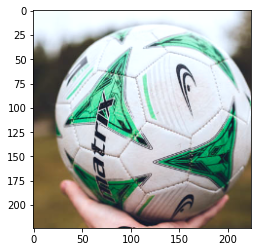

In [23]:
filepath = '/erik-mclean-D23_XPbsx-8-unsplash.jpg'
pred_proba = classifier.classify(filepath)


100.00% confidence that image is a tennis ball.


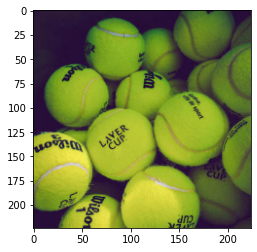

In [24]:
filepath = '/marvin-ronsdorf-CA998Anw2Lg-unsplash.jpg'
pred_proba = classifier.classify(filepath)
